### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
df_movieData = pd.read_csv('item.csv')
df_userData = pd.read_csv('user.csv')
df_userRatings = pd.read_csv('Data.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
df_movieData.info() #Movie data does not have any null values in any of the rows X columns.
df_movieData.shape #Movie data has 1681 rows and 22 columns (1681, 22)
df_movieData.describe()  
df_movieData.isnull().values.any() # Provides info is any of the values are missing in dataframe
df_movieData.isnull().sum().sum() # Provide count of missing values in data frame. In this case 0, so there are no missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

0

In [6]:
df_userData.info() #User data does not have any null values in any of the rows X columns.
df_userData.shape #User data has 943 rows and 4 columns (943,22)
df_userData.describe()  
df_userData.isnull().values.any() # Provides info is any of the values are missing in dataframe
df_userData.isnull().sum().sum() # Provide count of missing values in data frame. In this case 0, so there are no missing values.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


0

In [7]:
df_userRatings.info() #User data does not have any null values in any of the rows X columns.
df_userRatings.shape #User data has 943 rows and 4 columns (943,22)
df_userRatings.describe()  
df_userRatings.isnull().values.any() # Provides info is any of the values are missing in dataframe
df_userRatings.isnull().sum().sum() # Provide count of missing values in data frame. In this case 0, so there are no missing values.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


0

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [8]:
df_movieData[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
           ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum()


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [9]:
df_movieData = df_movieData.drop(columns=['unknown'])
df_movieData

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [10]:
df2 =pd.DataFrame(df_movieData.groupby('movie title')[['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
           ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum().sum(axis=1))

print(df2)
print(df2[df2[0]>1])

                                 0
movie title                       
'Til There Was You               2
1-900                            1
101 Dalmatians                   2
12 Angry Men                     1
187                              1
...                             ..
Young Guns                       3
Young Guns II                    3
Young Poisoner's Handbook, The   1
Zeus and Roxanne                 1
Á köldum klaka (Cold Fever)      2

[1658 rows x 1 columns]
                                       0
movie title                             
'Til There Was You                     2
101 Dalmatians                         2
20,000 Leagues Under the Sea           4
2001: A Space Odyssey                  4
3 Ninjas: High Noon At Mega Mountain   2
...                                   ..
Yankee Zulu                            2
Young Frankenstein                     2
Young Guns                             3
Young Guns II                          3
Á köldum klaka (Cold Fever) 

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

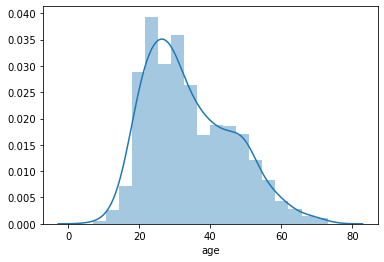

In [11]:
sns.distplot(df_userData['age'])
df_movieData['ReleaseYear']= pd.to_datetime(df_movieData['release date']).dt.year #Use distplot for age
#df_movieData

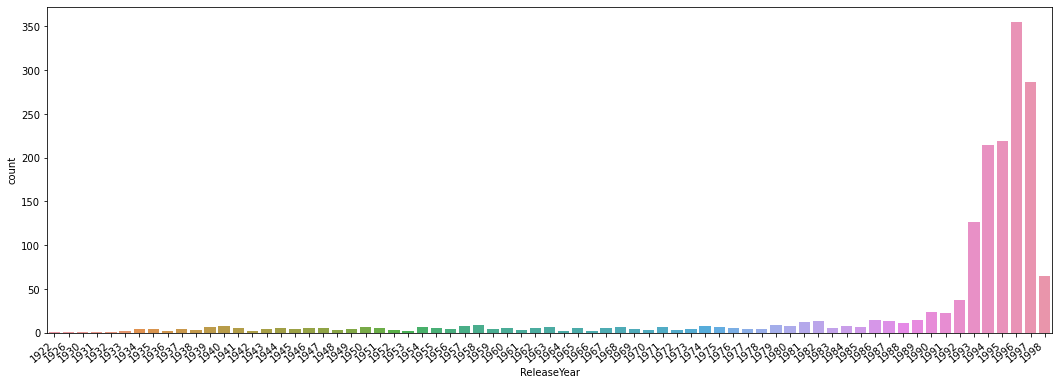

In [12]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x="ReleaseYear", data=df_movieData) #countplot for release year.
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


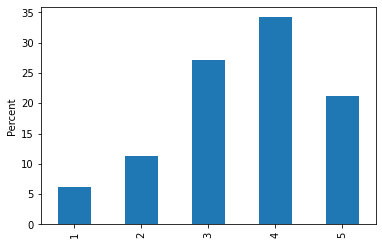

In [13]:
ax = (df_userRatings['rating'].value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")#Plot percentages in y-axis and categories in x-axis for ratings
plt.show()

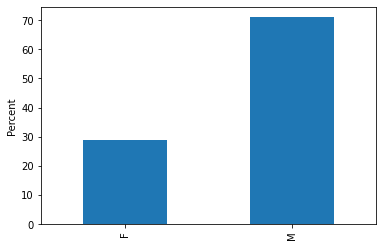

In [14]:
ax = (df_userData['gender'].value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")#Plot percentages in y-axis and categories in x-axis for gender 
plt.show()

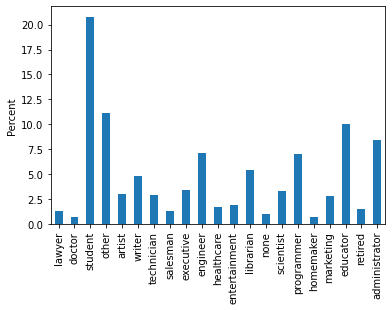

In [15]:
ax = (df_userData['occupation'].value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")#Plot percentages in y-axis and categories in x-axis for occupation
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

<ipython-input-31-31dc7418fc5f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2= df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
<ipython-input-31-31dc7418fc5f>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3= df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'


<Figure size 17280x14400 with 0 Axes>

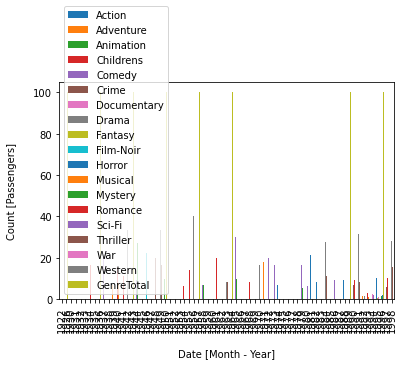

In [31]:
df2= df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
          ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()

#df2 =pd.DataFrame(df_movieData.groupby('ReleaseYear')['Action','Adventure']).values()

df3= df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
          ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum().sum(axis=1)
df2['GenreTotal'] =df3

df2
plt.figure(figsize=(240,200))
ax = (df2.div(df2['GenreTotal'], axis= 0) * 100).plot.bar()
plt.ylabel("Count [Passengers]", labelpad=16)
plt.xlabel("Date [Month - Year]", labelpad=16);
plt.show()



<ipython-input-35-ab5590a7623c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'


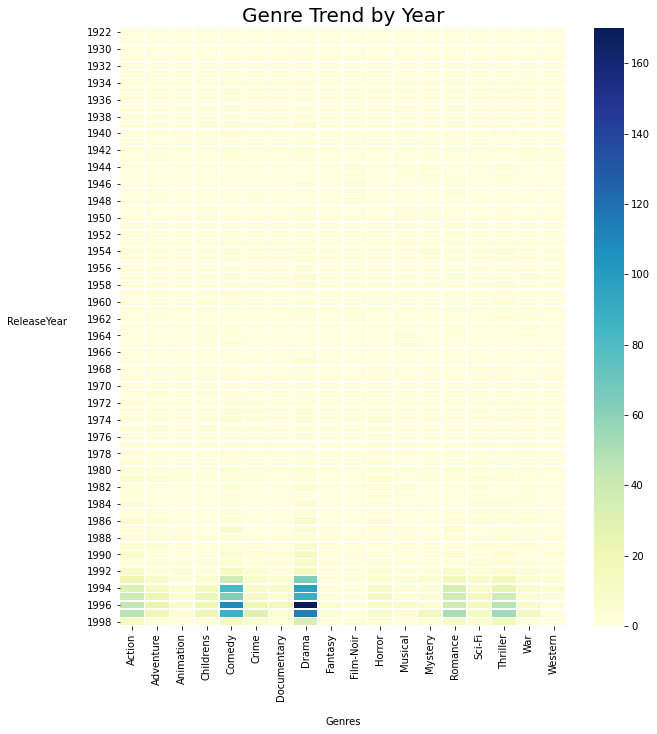

In [35]:
df4 = df_movieData.groupby('ReleaseYear')['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy'
          ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()
figure, axes = plt.subplots(figsize=(10, 11))
#(df4.div(df2['GenreTotal'], axis= 0) * 100)
sns.heatmap(df4, annot=False,  linewidths=.5, ax=axes, cmap="YlGnBu")
axes.axes.set_title("Genre Trend by Year", fontsize=20, y=1.01)
axes.axes.set_ylabel("ReleaseYear", labelpad=50, rotation=0)
axes.axes.set_xlabel("Genres", labelpad=16);
plt.yticks(rotation=0);

In [29]:
df4

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ReleaseYear,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [213]:
df2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,GenreTotal
ReleaseYear,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [171]:
dfUserRatedMovies =  pd.merge(df_movieData,df_userRatings)
dfUserRatedMovies.groupby('movie title')['rating'].count() # count of ratings 

movie title
'Til There Was You                   9
1-900                                5
101 Dalmatians                     109
12 Angry Men                       125
187                                 41
                                  ... 
Young Guns                         101
Young Guns II                       44
Young Poisoner's Handbook, The      41
Zeus and Roxanne                     6
Á köldum klaka (Cold Fever)          1
Name: rating, Length: 1658, dtype: int64

In [172]:
dfUserRatedMovies.groupby('movie title')['rating'].mean() #average ratings for every movie.


movie title
'Til There Was You                 2.333333
1-900                              2.600000
101 Dalmatians                     2.908257
12 Angry Men                       4.344000
187                                3.024390
                                     ...   
Young Guns                         3.207921
Young Guns II                      2.772727
Young Poisoner's Handbook, The     3.341463
Zeus and Roxanne                   2.166667
Á köldum klaka (Cold Fever)        3.000000
Name: rating, Length: 1658, dtype: float64

In [173]:
dfGt100 =pd.DataFrame(dfUserRatedMovies.groupby('movie title')['rating'].sum())
dfGt100[dfGt100['rating'] >100]#Slice the movies which have ratings more than 100.

,rating
movie title,
101 Dalmatians,317
12 Angry Men,543
187,124
2 Days in the Valley,300
"20,000 Leagues Under the Sea",252
...,...
Wyatt Earp,155
Young Frankenstein,789
Young Guns,324


In [183]:
dfUserRatedMovies.groupby('movie title')['rating'].mean().sort_values(ascending=False) #Sort values according to average rating such that movie which highest rating is on top.


movie title
Someone Else's America                    5.0
Marlene Dietrich: Shadow and Light (      5.0
Great Day in Harlem, A                    5.0
Santa with Muscles                        5.0
Saint of Fort Washington, The             5.0
                                         ... 
Eye of Vichy, The (Oeil de Vichy, L')     1.0
Every Other Weekend                       1.0
Mille bolle blu                           1.0
The Courtyard                             1.0
Mighty, The                               1.0
Name: rating, Length: 1658, dtype: float64

In [184]:
dfUserRatedMovies.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(25) #Select top 25 movies.

movie title
Someone Else's America                              5.000000
Marlene Dietrich: Shadow and Light (                5.000000
Great Day in Harlem, A                              5.000000
Santa with Muscles                                  5.000000
Saint of Fort Washington, The                       5.000000
Aiqing wansui                                       5.000000
Prefontaine                                         5.000000
They Made Me a Criminal                             5.000000
Entertaining Angels: The Dorothy Day Story          5.000000
Star Kid                                            5.000000
Pather Panchali                                     4.625000
Anna                                                4.500000
Some Mother's Son                                   4.500000
Everest                                             4.500000
Maya Lin: A Strong Clear Vision                     4.500000
Close Shave, A                                      4.491071
Schindler's 

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [230]:
dfUserDataMovies = pd.merge(dfUserRatedMovies,df_userData) #Merge all the datasets

dfUserDataMovies.groupby('gender')['Drama'].sum()
dfsumAxis = dfUserDataMovies.groupby('gender')['Drama'].sum().sum(axis=0)
dfUserDataMovies.groupby('gender')['Drama'].sum()/dfsumAxis*100
#Men watch more drama than women is true

gender
F    27.59243
M    72.40757
Name: Drama, dtype: float64

In [231]:
dfUserDataMovies = pd.merge(dfUserRatedMovies,df_userData) #Merge all the datasets

dfUserDataMovies.groupby('gender')['Sci-Fi'].sum()
dfsumAxis = dfUserDataMovies.groupby('gender')['Sci-Fi'].sum().sum(axis=0)
dfUserDataMovies.groupby('gender')['Sci-Fi'].sum()/dfsumAxis*100
#Women watch more Sci-Fi than men is False

gender
F    20.652003
M    79.347997
Name: Sci-Fi, dtype: float64

In [232]:
dfUserDataMovies = pd.merge(dfUserRatedMovies,df_userData) #Merge all the datasets

dfUserDataMovies.groupby('gender')['Romance'].sum()
dfsumAxis = dfUserDataMovies.groupby('gender')['Romance'].sum().sum(axis=0)
dfUserDataMovies.groupby('gender')['Romance'].sum()/dfsumAxis*100
#Men watch more Romance than women is True

gender
F    30.101228
M    69.898772
Name: Romance, dtype: float64